# Import required libraries

In [2]:
import pandas as pd
import sklearn.model_selection as skms

# Utility functions

In [ ]:
def compute_confusion_matrix(sufix, y_test, y_pred):

    labels = [False, True]

    # Compute the confusion matrix
    conf_matrix = skmt.confusion_matrix(y_test, y_pred, labels=labels)
    print(f"[{sufix}]confusion matrix:\n",conf_matrix)

    if len(conf_matrix[0]) == 1:
        print("Skipping ConfusionMatrixDisplay because a single label was found in 'y_true' and 'y_pred'.")
        return

    # Create a display object for the confusion matrix
    disp = skmt.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["No Granted", "Granted"])

    # Plot the confusion matrix
    disp.plot(cmap=plt.cm.Blues, values_format=".0f")
    plt.title(f"[{sufix}] Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


def plot_class_distribution_train_test_sets(X_train, y_train, X_test, y_test):
    # Combine X_train with y_train
    train_df = pd.concat([X_train, y_train], axis=1)

    # Combine X_test with y_test
    test_df = pd.concat([X_test, y_test], axis=1)

    # Add a column to indicate the source of the data (train or test)
    train_df['Set'] = 'Train'
    test_df['Set'] = 'Test'

    # Concatenate the two DataFrames
    combined_data = pd.concat([train_df, test_df])

    # Define custom colors for Train and Test
    custom_colors = ['#e74c3c', '#228B22']  # e.g., red for False, green for True

    # Plot the class distribution
    plt.figure()
    ax = sns.countplot(data=combined_data, x='Set', hue='scholarship', palette=custom_colors)
    plt.title('Class Distribution in Train and Test Sets')
    plt.xlabel('Scholarship')
    plt.ylabel('Count')
    plt.legend(title='Dataset')

    # Specify title and labels
    plt.title('Class Distribution in Train and Test Sets')
    plt.xlabel('Datasets')
    plt.ylabel('Count')
    plt.legend(title='Scholarship')  

    # Add count values on top of each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')

    # Show the plot
    plt.show()

def evaluate_classifier(y_test, y_pred):
    # Compute and print Accuracy
    accuracy_score = skmt.accuracy_score(y_test, y_pred)
    print('Accuracy: %.2f' % (accuracy_score*100))

    # Compute and print Balanced Accuracy
    balanced_accuracy = skmt.balanced_accuracy_score(y_test, y_pred)
    print('Balanced Accuracy: %.2f' % (balanced_accuracy*100))

    # Compute and show confusion matrix
    compute_confusion_matrix('General',y_test, y_pred)

def show_scholarship_prediction_results(classifier, X_test, y_test, y_pred):
    print(f'\n*************************************** {classifier} ***************************************')
    
    # Accuracy scores
    print("Accuracy:",round(skmt.accuracy_score(y_test,y_pred)*100,2),"%")
    
    # General confusion matrix
    compute_confusion_matrix('General',y_test, y_pred)

    df1 =  pd.DataFrame(X_test)
    df1['scholarship'] = y_test
    df1['prediction'] = y_pred

    df_male = df1[(df1['gender'] == 0) & (df1['married']) == 0] # Single male
    df_female = df1[(df1['gender'] == 1) & (df1['married']) == 1] # Married female

     # confusion matrix per gender and civil status
    compute_confusion_matrix('Married female', df_female['scholarship'], df_female['prediction'])
    compute_confusion_matrix('Single male', df_male['scholarship'], df_male['prediction'])

    print('***********************************************************************************')

# Load dataset

In [3]:
dataset_ulr = 'https://raw.githubusercontent.com/leticiaarco/practical_ethical_ai_resources/refs/heads/main/scholarship.csv'
data = pd.read_csv(dataset_ulr)
data.head()
df = pd.DataFrame(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   salary       120 non-null    float64
 1   gender       120 non-null    object 
 2   married      120 non-null    object 
 3   achievement  120 non-null    float64
 4   scholarship  120 non-null    bool   
dtypes: bool(1), float64(2), object(2)
memory usage: 4.0+ KB


# Handle data

Transform feature values

In [4]:
transformed_data = data

transformed_data['gender'] = transformed_data['gender'].map({
    'F':1,
    'M':0,
})

transformed_data['married'] = transformed_data['married'].map({
    'Y':1,
    'N':0,
})

Split dataset by predictive features (X) and objective feature (y)

In [5]:
X = transformed_data.drop('scholarship', axis=1)
y = transformed_data['scholarship']

Split dataset in train and test sets

In [6]:
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.3, random_state=0)

### <span style="color:red">Hands-on exercise 1: Analyse data</span>
<span style="color:red">a) Analyse the collected data</span>  
<span style="color:red">b) Identify issues that could influence results</span>  
<span style="color:red">c) Improve the ‘data handling’ step</span>  
<span style="color:red">d) Summarise your main findings from the data analysis carried out</span>

### Work on hands-on exercise 1 here

# Train the classifier

Imports

In [7]:
import tensorflow.keras.models as tkm
import tensorflow.keras.layers as tkl
from tensorflow.keras.utils import plot_model #AQUI pip install pydot

Initialize a neural network

In [8]:
model = tkm.Sequential()
model.add(tkl.Input(shape=(4,)))
model.add(tkl.Dense(12, activation='relu'))
model.add(tkl.Dense(8, activation='relu'))
model.add(tkl.Dense(1, activation='sigmoid'))

Visualise topology

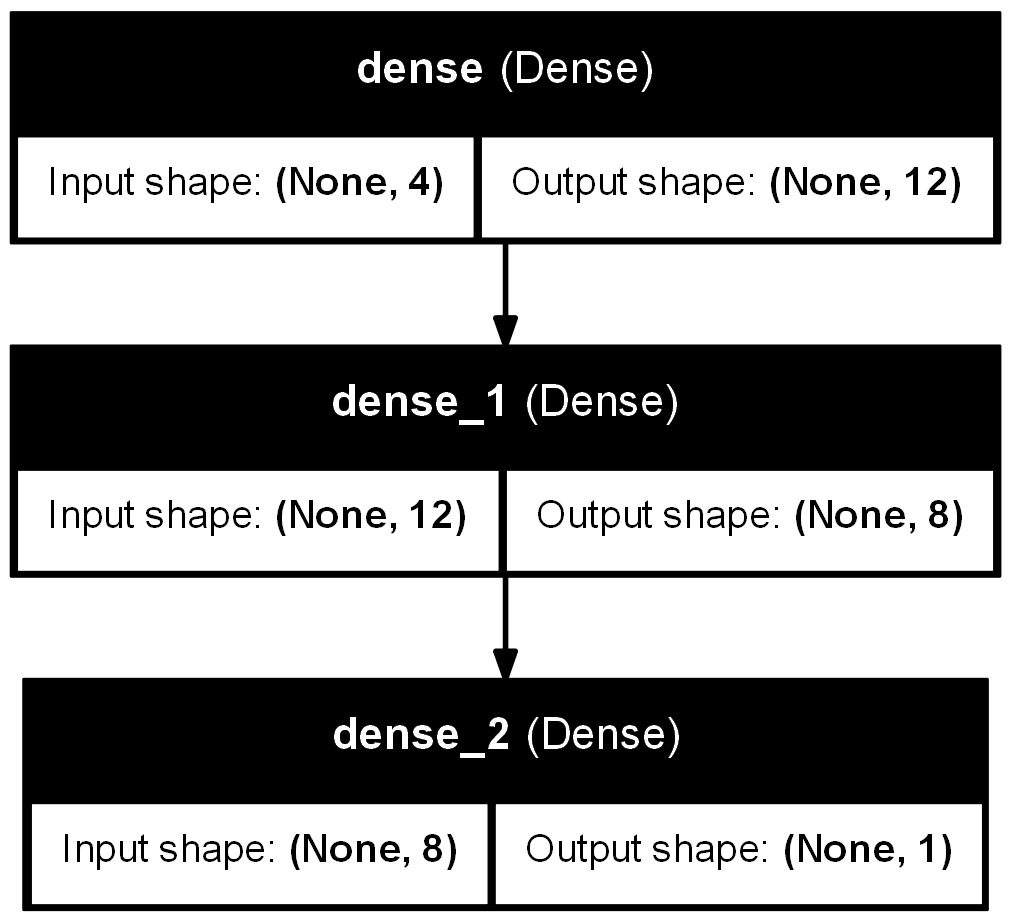

In [9]:
# Generate the model diagram
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Compile model and fit it on the dataset

In [ ]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6952 - loss: 50.9021  
Epoch 2/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9376 - loss: 11.9042 
Epoch 3/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8348 - loss: 19.0344    
Epoch 4/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9275 - loss: 13.6234 
Epoch 5/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8724 - loss: 6.6552     
Epoch 6/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9315 - loss: 9.2044     
Epoch 7/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9489 - loss: 11.2961    
Epoch 8/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9034 - loss: 7.4126 
Epoch 9/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9398 - loss: 15.7312    
Epoch 10/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9336 - loss: 8.5681  
Epoch 11/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6852 - loss: 68.4367  
Epoch 12/150
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

### <span style="color:red">Hands-on exercise 2: Analyse classifier</span>
<span style="color:red">a) Analyse the selected model and training</span>  
<span style="color:red">b) Identify issues that could influence results</span>  
<span style="color:red">c) Improve the classification process
</span>  
<span style="color:red">d) Summarise your main findings and potential solutions</span>

### Work on hands-on exercise 2 here

# Eval the classifier

Evaluate the keras model

In [15]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9051 - loss: 23.9474  
Accuracy: 88.89


### <span style="color:red">Hands-on exercise 3: Analyse evaluation</span>
<span style="color:red">a) Analyse the classification results</span>  
<span style="color:red">b) Identify issues in the ‘model evaluation’ task</span>  
<span style="color:red">c) Modify the ‘model evaluation’ task if needed</span>  
<span style="color:red">d) Summarise your main findings and potential solutions</span>

### Work on hands-on exercise 3 here